In [2]:
import numpy as np
from glob import glob
import os

In [3]:
import torch
import sys
sys.path.append("../")
import dataloader
x,y,_,_= dataloader.load_file_frequency(sample_num=400,type="scatter_field_f")
x_train = torch.tensor(x[:350*50,:,:,:]).float()
x_test = torch.tensor(x[350*50:,:,:,:]).float()
y_train = torch.tensor(y[:350*50,:,:,:]).float()
y_test = torch.tensor(y[350*50:,:,:,:]).float()

x_normalizer = dataloader.UnitGaussianNormalizer(x_train)

/media/data5/cyanzhao/gpr/log/log_log_born/type_born_|_optimizer_adam_|_norm_2_|_fno_par_(10, 128)_|_fno_noise_0.0_|_latent_64_|_gamma_0.5_|_filter_1_|_noise_src_0.0_|_prior_autoencoder_|_lr_0.01_|_num_iter_1200_|_pivit_1_|_pivit_iter_300_|_reg_coeff_0.01_|_mask_line_|_in_f_1_|/summary.txt


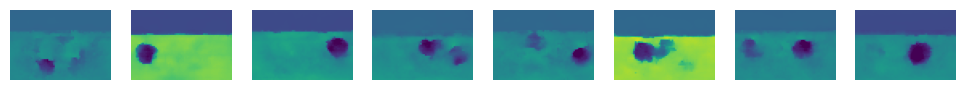

/media/data5/cyanzhao/gpr/log/log_log_born/type_born_|_optimizer_adam_|_norm_2_|_fno_par_(10, 128)_|_fno_noise_0.0_|_latent_64_|_gamma_0.5_|_filter_1_|_noise_src_0.0_|_prior_None_|_lr_0.1_|_num_iter_1200_|_pivit_0_|_pivit_iter_300_|_reg_coeff_0.01_|_mask_line_|_in_f_1_|/summary.txt


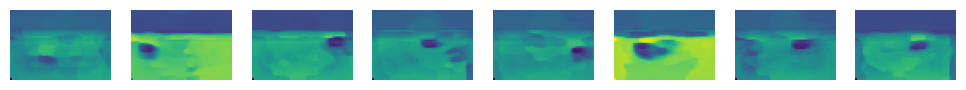

In [6]:
import matplotlib.pyplot as plt
def load(logdir):
    file = np.load(logdir)
    estimate_par_denorm = x_normalizer.decode(torch.tensor(file))
    plt.imshow((estimate_par_denorm[0,:-19,:,0]).numpy(),vmax=10,vmin=1)

# modify the path to the folder of the inverse problem log
paths = glob("./log/log_log_born/*line*_in_f_1*/summary.txt")
for path in paths:
    print(path)
    plt.figure(figsize=[20,10])
    for idx,i in enumerate(range(0,50,6)[:-1]):
        plt.subplot(4,13,idx+1)
        path_folder=glob("{}/{}/*.npy".format(path[:-12],i))[0]
        load(path_folder)
        plt.gca().invert_yaxis()

        plt.axis('off')
    plt.show()

In [9]:
import matplotlib.pyplot as plt
def load(logdir):
    file = np.load(logdir)
    estimate_par_denorm = x_normalizer.decode(torch.tensor(file))
    return estimate_par_denorm[0,:,:,0]


# modify the path to the folder of the inverse problem log
paths = glob("./log/log_log_born/*line*_in_f_1*/summary.txt")
# print(path[:-12])
for path in paths:
    print(path)
    estimate_par_denorm = []
    for idx,i in enumerate(range(50)):
        try:
            path_folder=glob("{}/{}/*.npy".format(path[:-12],i))[0]
        except:
            break
        estimate_par_denorm.append(load(path_folder))
    gt = []
    for idx,i in enumerate(range(len(estimate_par_denorm))):
        gt.append(x_test[i*50,:,:,0].numpy())
    mse = []
    for i in range(len(estimate_par_denorm)):
        mse.append(((estimate_par_denorm[i][:,:]-gt[i][:,:])**2).mean())
    print(sum(mse)/len(mse),len(mse))

/media/data5/cyanzhao/gpr/log/log_log_born/type_born_|_optimizer_adam_|_norm_2_|_fno_par_(10, 128)_|_fno_noise_0.0_|_latent_64_|_gamma_0.5_|_filter_1_|_noise_src_0.0_|_prior_autoencoder_|_lr_0.01_|_num_iter_1200_|_pivit_1_|_pivit_iter_300_|_reg_coeff_0.01_|_mask_line_|_in_f_1_|/summary.txt
tensor(0.7613) 50
/media/data5/cyanzhao/gpr/log/log_log_born/type_born_|_optimizer_adam_|_norm_2_|_fno_par_(10, 128)_|_fno_noise_0.0_|_latent_64_|_gamma_0.5_|_filter_1_|_noise_src_0.0_|_prior_None_|_lr_0.1_|_num_iter_1200_|_pivit_0_|_pivit_iter_300_|_reg_coeff_0.01_|_mask_line_|_in_f_1_|/summary.txt
tensor(1.0604) 50
